In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(-5,5,100)
y = np.sqrt(10**2 - X**2)
y = np.hstack([y,-y])
x = np.hstack([X,-X])

In [3]:
X1 = np.linspace(-5,5,100)
y1 = np.sqrt(5**2 - X1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([X1,-X1])

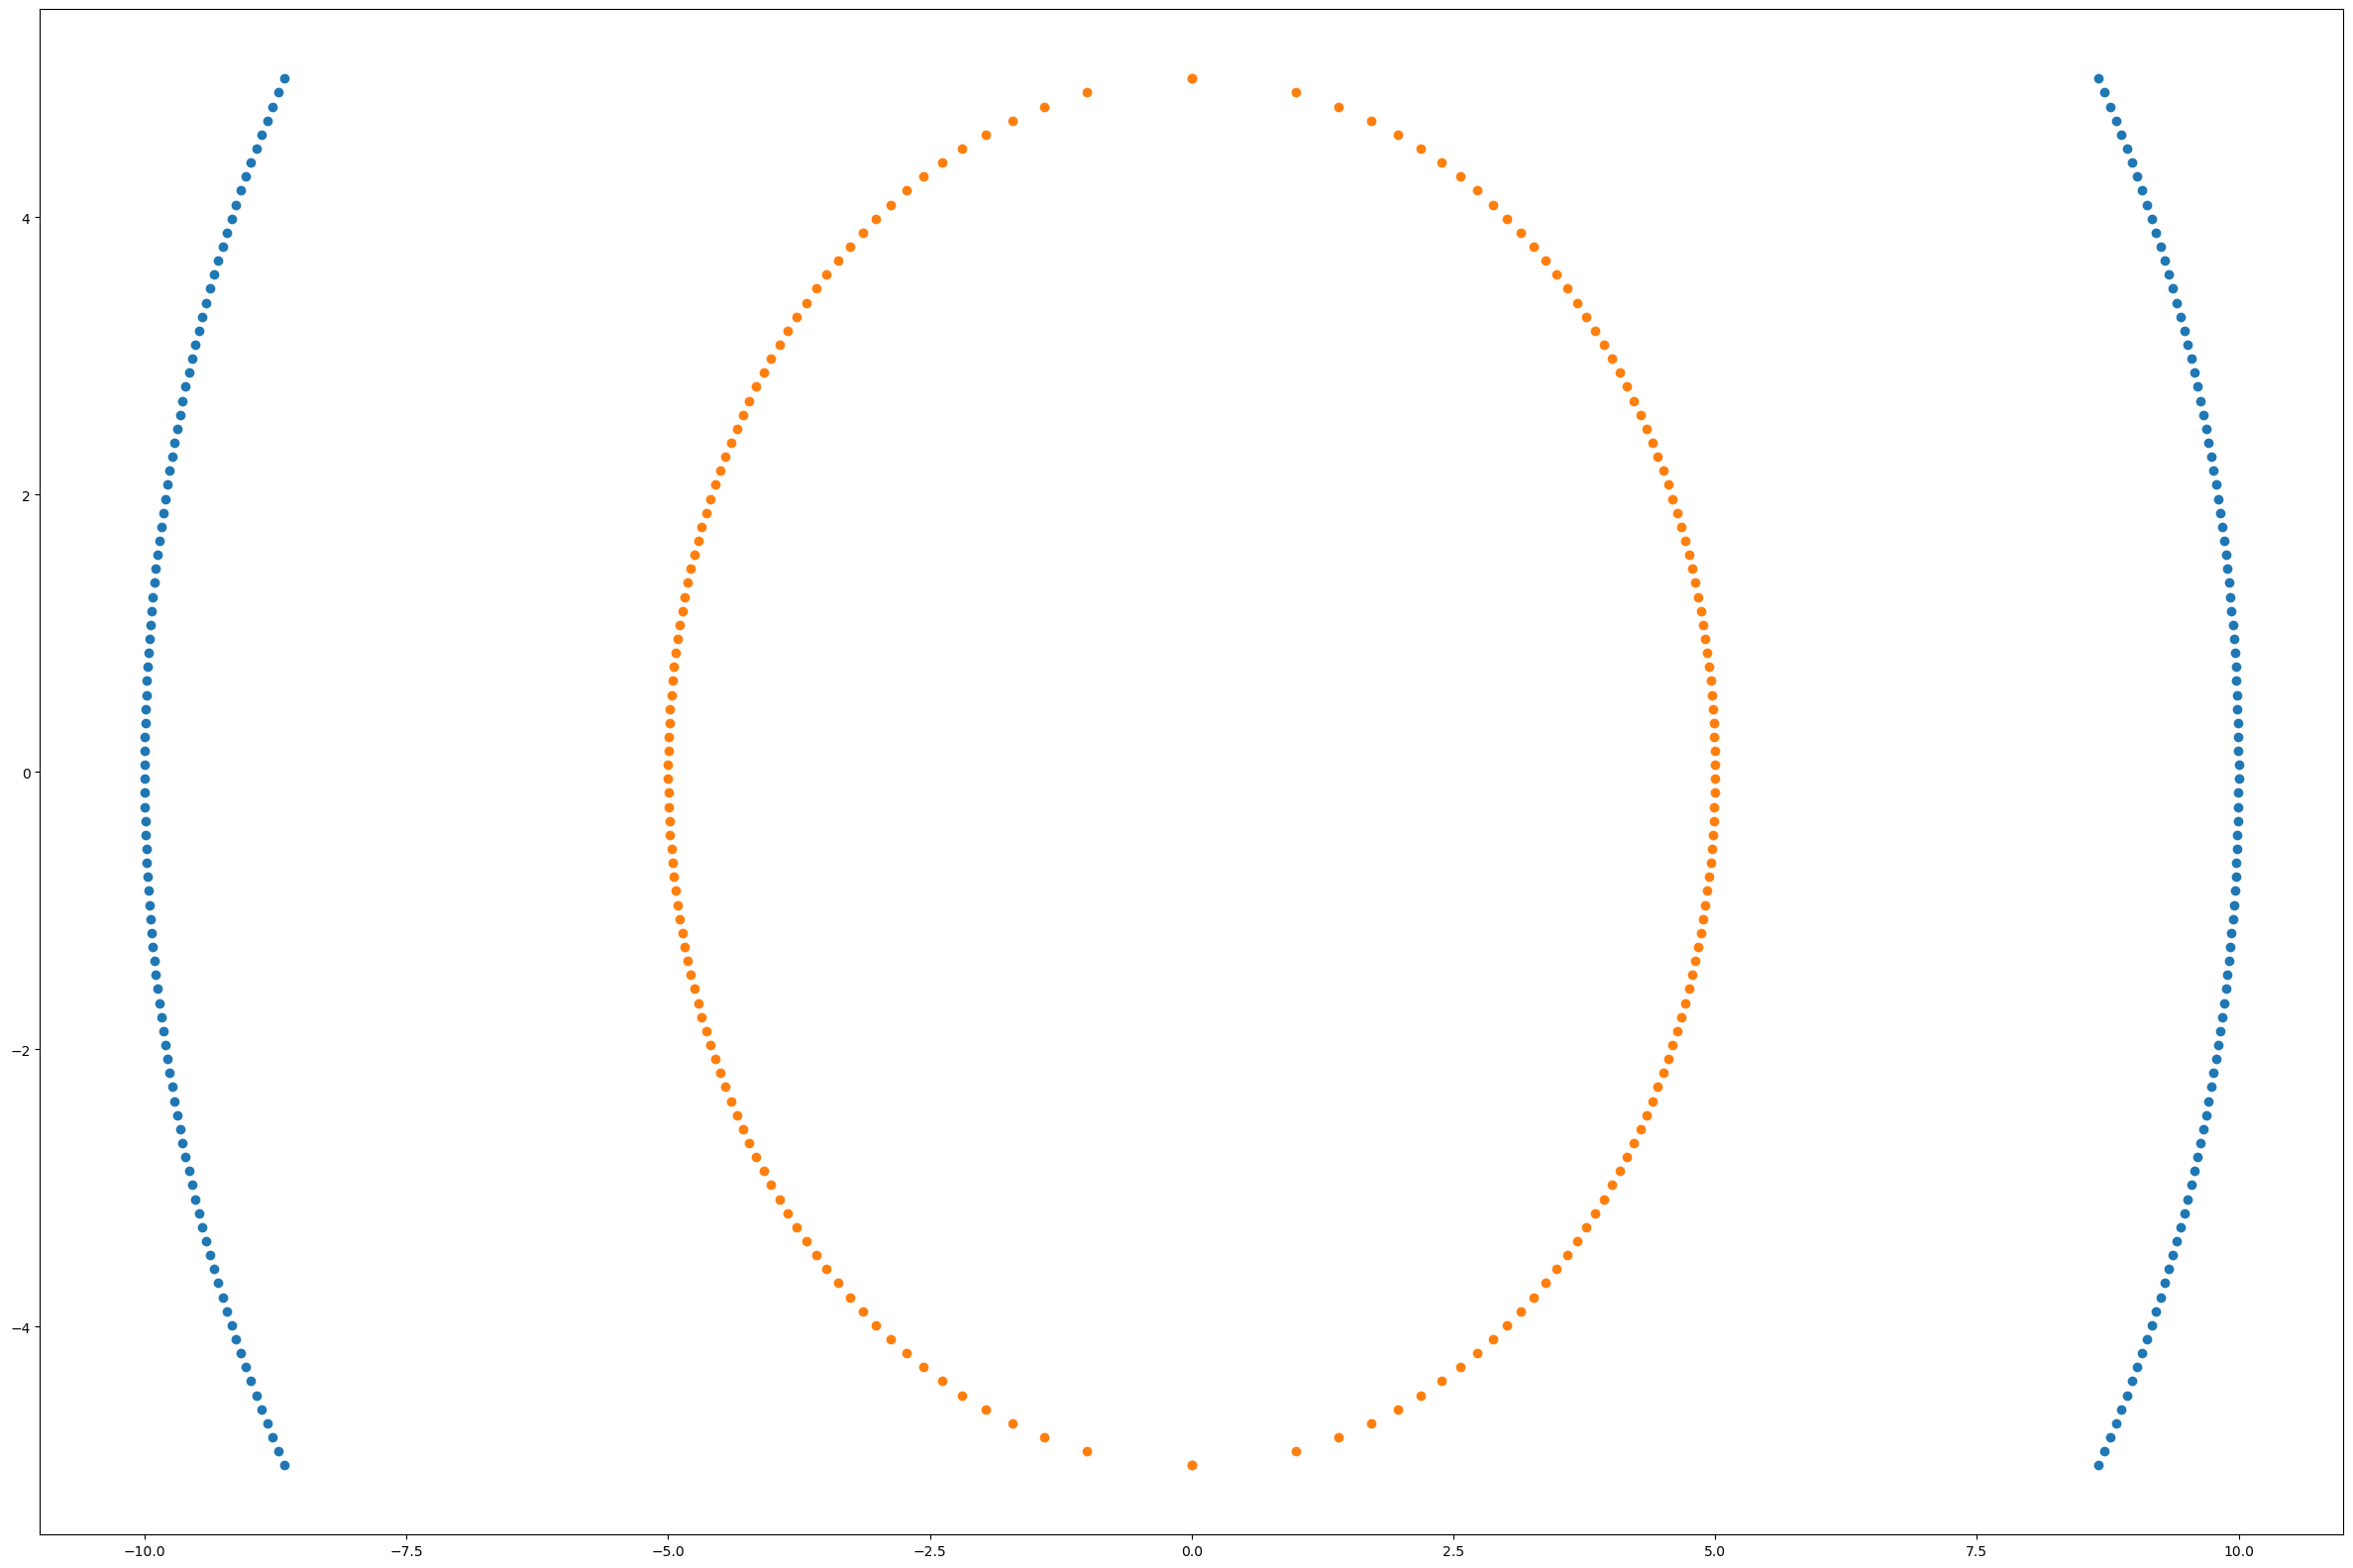

In [4]:
plt.figure(figsize=(30,20))
plt.scatter(y,x)
plt.scatter(y1,x1)

#### This type of data can not seperate with sinlgle Linear line


In [5]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y'] = 0

In [6]:
df1

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-8.881281,-4.59596,0
196,-8.828277,-4.69697,0
197,-8.773790,-4.79798,0
198,-8.717792,-4.89899,0


In [7]:
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y'] = 1

In [8]:
df2

,X1,X2,Y
0,0.000000,-5.00000,1
1,0.999949,-4.89899,1
2,1.406908,-4.79798,1
3,1.714198,-4.69697,1
4,1.969049,-4.59596,1
...,...,...,...
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1


In [9]:
df1.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [10]:
df2.head()

,X1,X2,Y
0,0.000000,-5.00000,1
1,0.999949,-4.89899,1
2,1.406908,-4.79798,1
3,1.714198,-4.69697,1
4,1.969049,-4.59596,1


In [11]:
df=df1.append(df2)

C:\conda_tmp\ipykernel_12684\2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [12]:
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1


In [13]:
df = df.set_index(i for i in range(400))

In [14]:
X = df.iloc[:,:2]

In [15]:
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
395,-1.969049,-4.59596
396,-1.714198,-4.69697
397,-1.406908,-4.79798
398,-0.999949,-4.89899


In [16]:
y = df.iloc[:,-1]

In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=21)

## Linear Kernel 

In [19]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [20]:
df.Y.value_counts()

0    200
1    200
Name: Y, dtype: int64

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_pred)

0.46

<Axes: xlabel='X1', ylabel='X2'>

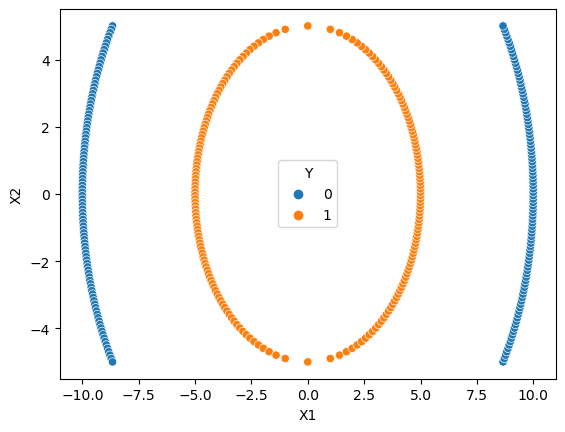

In [36]:
import seaborn as sns
import matplotlib
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['Y'],data=df)

## RBF kernel or Gaussian Kernel

In [53]:
from sklearn.svm import SVC
model_rbf=SVC(kernel='rbf')
model_rbf.fit(X_train,y_train)
y_pred_rbf = model_rbf.predict(X_test)
accuracy_score(y_test,y_pred_rbf)

1.0

## Polynomial Kernel

In [56]:
from sklearn.svm import SVC
model_poly=SVC(kernel='poly')
model_poly.fit(X_train,y_train)
y_pred_poly = model_poly.predict(X_test)
accuracy_score(y_test,y_pred_poly)

0.65

## Sigmoid Kernel

In [57]:
from sklearn.svm import SVC
model_sigmoid=SVC(kernel='sigmoid')
model_sigmoid.fit(X_train,y_train)
y_pred_sigmoid = model_sigmoid.predict(X_test)
accuracy_score(y_test,y_pred_sigmoid)

0.6